# Importing libraries

In [1]:
# importing basic array & dataframe manipulation
import pandas as pd
import numpy as np

# importing visualization library & setting visualizations parameters

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # for 3-D visualization
sns.set_theme(style = 'darkgrid', palette = 'inferno')
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

# warnings library to ignore display of warnings
import warnings
warnings.filterwarnings('ignore')

# importing classes for standardization & label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing train test split for data splitting
from sklearn.model_selection import train_test_split,

# importing sequential class
from keras.models import Sequential

# importing dense & lstm for creating a lstm model
from keras.layers import Dense, LSTM

# evaluation metrics for Regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_auc_score, roc_curve

pd.set_option('display.max_columns', None)


In [2]:
# reading the data from raw file from github

df = pd.read_csv('https://raw.githubusercontent.com/PariketPasari/project_datasets/main/delivery_train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


# Data Dictionary

- **ID:** Unique identifier for each record.
- **Delivery_person_ID:** Unique identifier for each delivery person.
- **Delivery_person_Age:** Age of the delivery person.
- **Delivery_person_Ratings:** Ratings of the delivery person.
- **Restaurant_latitude:** Latitude of the restaurant from which the order is placed.
- **Restaurant_longitude:** Longitude of the restaurant from which the order is placed.
- **Delivery_location_latitude:** Latitude of the delivery location.
- **Delivery_location_longitude:** Longitude of the delivery location.
- **Order_Date:** Date when the order was placed.
- **Time_Ordered:** Time when the order was placed.
- **Time_Order_picked:** Time when the order was picked up by the delivery person.
- **Weather_conditions:** Weather conditions at the time of delivery.
- **Road_traffic_density:** Level of road traffic density at the time of delivery.
- **Vehicle_condition:** Condition of the delivery vehicle.
- **Type_of_order:** Type of food order (e.g., Snack, Buffet, Drinks).
- **Type_of_vehicle:** Type of delivery vehicle (e.g., motorcycle, scooter).
- **Multiple_deliveries:** Binary indicator (0 or 1) whether the delivery person is handling multiple deliveries simultaneously.
- **Festival:** Binary indicator (Yes or No) if there is a festival at the time of delivery.
- **City:** City where the delivery is taking place.
- **Time_taken(min):** The time taken for the delivery in minutes.


# Exploratory Data Analysis

**We rely solely on latitude and longitude points for both the restaurant and delivery location. To determine the distance between them, the haversine formula is employed, taking into account the spherical geometry defined by their respective latitudes and longitudes**

In [3]:
# creating a varibale distrance using lattitude & longitude of restaurant & delivery

R = 6371 # radius of earth in km

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'],
                                        df.loc[i, 'Restaurant_longitude'],
                                        df.loc[i, 'Delivery_location_latitude'],
                                        df.loc[i, 'Delivery_location_longitude'])

In [4]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6.210138


In [5]:
# cheecking basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

**we can observe from the above two outputs that the data is not in a good condition**
 - ratting,  age, multiple deliveries, time taken - should be INT instead of object tpye
 - order date , time orderd, time order picked - should be in date time format instead of object type

 **lets explore & clean the data**

### Data Cleaning

In [6]:
# dropping id column & delivery person id column as it is not important for model training

df.drop('ID',axis = 1, inplace = True)

**checking unique values & NaN values for columns**

In [7]:
# checking for inaccuracies in  delivery person age column

df['Delivery_person_Age'].unique()

array(['37', '34', '23', '38', '32', '22', '33', '35', '36', '21', '24',
       '29', '25', '31', '27', '26', '20', 'NaN ', '28', '39', '30', '15',
       '50'], dtype=object)

**because of presence of nan text the column is read as object datatype**

In [8]:
# handling inaccuracy & converting datatype from object to numeric
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')

df['Delivery_person_Age'].unique()

# the NAN text is converted to actucal NAN value & it can be imputed

array([37., 34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25.,
       31., 27., 26., 20., nan, 28., 39., 30., 15., 50.])

In [9]:
# checking for inaccuracies in  delivery person rating column

df['Delivery_person_Ratings'].unique()

array(['4.9', '4.5', '4.4', '4.7', '4.6', '4.8', '4.2', '4.3', '4', '4.1',
       '5', '3.5', 'NaN ', '3.8', '3.9', '3.7', '2.6', '2.5', '3.6',
       '3.1', '2.7', '1', '3.2', '3.3', '6', '3.4', '2.8', '2.9', '3'],
      dtype=object)

**because of presence of nan text the column is read as object datatype**

In [10]:
# handling inaccuracy & converting datatype from object to numeric

df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

df['Delivery_person_Ratings'].unique()

# the NAN text is converted to actucal NAN value & it can be imputed

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [11]:
# checking for inaccuracies on time taken column

df['Time_taken(min)'].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

**the time taken column has (min) text in it & its the reason for the column to appear as object  column**

In [12]:
# removing the (min) from the column & converting it to int data type

df['Time_taken(min)'] = df['Time_taken(min)'].str.replace('(min)', '',regex=False).astype(int)


df['Time_taken(min)'].unique()

# the data in this column is accurate

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [13]:
df['Time_taken(min)'].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [14]:
# checking for multipe deliveries column

df['multiple_deliveries'].unique()

array(['0', '1', '3', 'NaN ', '2'], dtype=object)

**because of presence of nan text the column is read as object datatype**

In [15]:
# correcting the datatype of column multiple deliveries

df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce')

df['multiple_deliveries'].unique()
# the NAN text is converted to actucal NAN value & it can be imputed

array([ 0.,  1.,  3., nan,  2.])

In [16]:
# checking for inaccuracies in weather conditions

df['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

**we need to remove the the word 'Conditions from the data to make it uniform & easy to interpret'**

In [17]:
# removing condition from weather condition to only keep actual condition

df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ','')

df['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', 'NaN'],
      dtype=object)

In [18]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.210138


**checking for frequency of occuracnce of each category**

**we can get the idea of mode for each categorical column which would help us to impute nan values with mode**

In [19]:
# checking for inaccuracies in road traffic density column

df['Road_traffic_density'].value_counts()

Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: Road_traffic_density, dtype: int64

In [20]:
# checking for inaccuracies in type of order column
df['Type_of_order'].value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64

In [21]:
# checking for inaccuracies in type of vehichle column

df['Type_of_vehicle'].value_counts()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

In [22]:
# checking for inaccuracies in festival column

df['Festival'].value_counts()

No      44469
Yes       896
NaN       228
Name: Festival, dtype: int64

In [23]:
# checking for inaccuracies in festival column


df['City'].value_counts()

Metropolitian     34093
Urban             10136
NaN                1200
Semi-Urban          164
Name: City, dtype: int64

**Road traffic density, city, festival, have NAN vlaues, we need to handle them**

**it is observed that there are extra whitespaces in data, especially in object columns so for consistency we need to remove those extra white spaces**

In [24]:
# removing whitespaces for starting & ending of all the strings

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].apply(lambda x: x.strip())

### Handling Missing (NAs, NaNs) values

In [25]:
# checking for null vlaues
print(df.isna().sum());
for i in df.isna().sum():
    print('missing value',i/len(df) * 100)


Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
distance                          0
dtype: int64
missing value 0.0
missing value 4.066413703858048
missing value 4.184852937951001
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missing value 0.0
missi

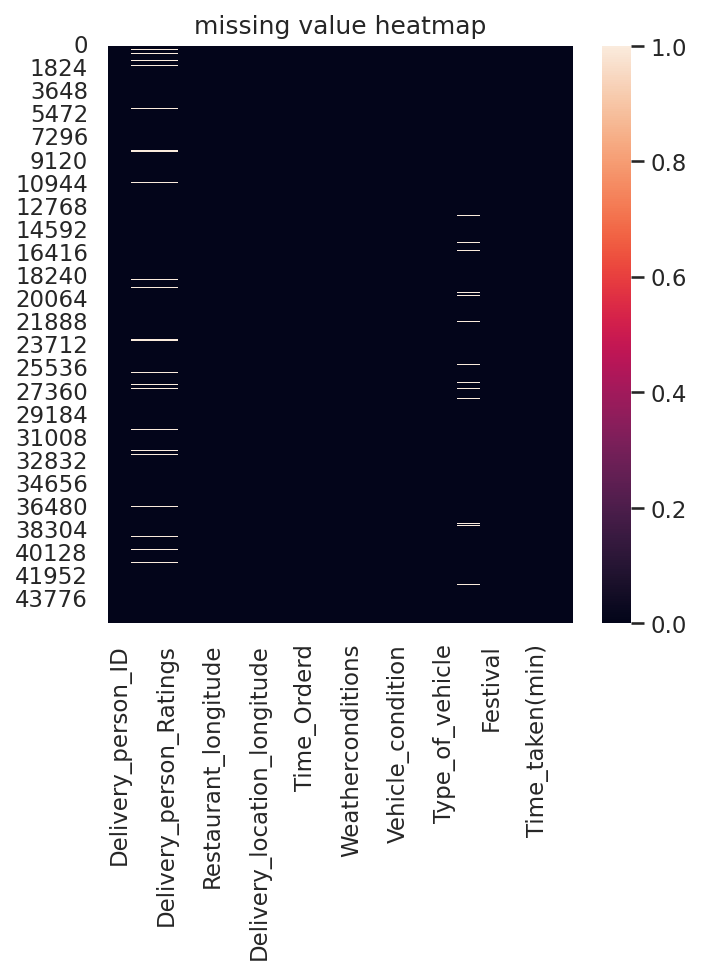

In [26]:
# heatmap for missing vlaues to check for rows with missing values
sns.heatmap(df.isna())
plt.title('missing value heatmap')
plt.show()

In [27]:
# dropping missing values

df.dropna(inplace=True)

In [28]:
# selecting columns with only object type

df.select_dtypes(include=['object'])

,Delivery_person_ID,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,INDORES13DEL02,19-03-2022,11:30:00,11:45:00,Sunny,High,Snack,motorcycle,No,Urban
1,BANGRES18DEL02,25-03-2022,19:45:00,19:50:00,Stormy,Jam,Snack,scooter,No,Metropolitian
2,BANGRES19DEL01,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,Drinks,motorcycle,No,Urban
3,COIMBRES13DEL02,05-04-2022,18:00:00,18:10:00,Sunny,Medium,Buffet,motorcycle,No,Metropolitian
4,CHENRES12DEL01,26-03-2022,13:30:00,13:45:00,Cloudy,High,Snack,scooter,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,24-03-2022,11:35:00,11:45:00,Windy,High,Meal,motorcycle,No,Metropolitian
45589,AGRRES16DEL01,16-02-2022,19:55:00,20:10:00,Windy,Jam,Buffet,motorcycle,No,Metropolitian
45590,CHENRES08DEL03,11-03-2022,23:50:00,00:05:00,Cloudy,Low,Drinks,scooter,No,Metropolitian
45591,COIMBRES11DEL01,07-03-2022,13:35:00,13:40:00,Cloudy,High,Snack,motorcycle,No,Metropolitian


In [29]:
# replacing NAN value  of time ordered with mode
df['Time_Orderd'].replace('NaN',"21:55:00",inplace=True)

# replacing NAN values in multiple deliveries column with most occuring value which is 1
df['multiple_deliveries'].replace('NaN',1, inplace= True)

# replacing NAN in weather conditon with other
df['Weatherconditions'].replace('NaN', 'other', inplace = True)

# replacing NAN in Road traffic density with Low
df['Road_traffic_density'].replace('NaN','Low', inplace = True)

# replacing NaN in road traffic density with No
df['Festival'].replace('NaN','No',inplace = True)

# replacing NaN in city with other
df['City'].replace('NaN','other', inplace=True)

In [30]:
# converting order date, time ordered & time ordered picked to date time format

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])

In [31]:
#Extract city code from Delivery person ID

df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
df['City_code'].unique()

array(['INDO', 'BANG', 'COIMB', 'CHEN', 'HYD', 'RANCHI', 'MYS', 'DEH',
       'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'KOL', 'JAP', 'SUR', 'GOA',
       'AURG', 'AGR', 'VAD', 'ALH', 'BHP'], dtype=object)

In [32]:
# mapping city name shortforms to their full name

# Mapping dictionary
city_mapping = {
    'INDO': 'Indore',
    'BANG': 'Bangalore',
    'COIMB': 'Coimbatore',
    'CHEN': 'Chennai',
    'HYD': 'Hyderabad',
    'RANCHI': 'Ranchi',
    'MYS': 'Mysuru',
    'DEH': 'Delhi',
    'KOC': 'Kochi',
    'PUNE': 'Pune',
    'LUDH': 'Ludhiana',
    'KNP': 'Kanpur',
    'MUM': 'Mumbai',
    'KOL': 'Kolkata',
    'JAP': 'Jaipur',
    'SUR': 'Surat',
    'GOA': 'Goa',
    'AURG': 'Aurangabad',
    'AGR': 'Agra',
    'VAD': 'Vadodara',
    'ALH': 'Aligarh',
    'BHP': 'Bhopal'
}

# Map the short forms to full names
df['City_code'] = df['City_code'].map(city_mapping)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42752 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_ID           42752 non-null  object        
 1   Delivery_person_Age          42752 non-null  float64       
 2   Delivery_person_Ratings      42752 non-null  float64       
 3   Restaurant_latitude          42752 non-null  float64       
 4   Restaurant_longitude         42752 non-null  float64       
 5   Delivery_location_latitude   42752 non-null  float64       
 6   Delivery_location_longitude  42752 non-null  float64       
 7   Order_Date                   42752 non-null  datetime64[ns]
 8   Time_Orderd                  42752 non-null  datetime64[ns]
 9   Time_Order_picked            42752 non-null  datetime64[ns]
 10  Weatherconditions            42752 non-null  object        
 11  Road_traffic_density         42752 non-nu

In [34]:
# getting statistical information about numerical columns form the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,42752.0,29.581540,5.817324,15.000000,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,42752.0,4.633063,0.335704,1.000000,4.500000,4.700000,4.900000,6.000000
Restaurant_latitude,42752.0,17.220071,7.749134,-30.902872,12.933298,18.551440,22.732225,30.914057
Restaurant_longitude,42752.0,70.688839,21.433115,-88.366217,73.170283,75.898497,78.045359,88.433452
Delivery_location_latitude,42752.0,17.465048,7.334405,0.010000,12.986229,18.633934,22.785207,31.054057
Delivery_location_longitude,42752.0,70.851858,21.103010,0.010000,73.280000,76.003106,78.104714,88.563452
Vehicle_condition,42752.0,1.004000,0.821376,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,42752.0,0.743474,0.572781,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken(min),42752.0,26.366509,9.369407,10.000000,19.000000,26.000000,32.000000,54.000000
distance,42752.0,38.414599,536.437114,1.465067,4.663484,9.220866,13.682516,19692.674606


### Visualizations

In [35]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,City_code
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-12-01 11:30:00,2023-12-01 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025149,Indore
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-12-01 19:45:00,2023-12-01 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.183530,Bangalore
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-12-01 08:30:00,2023-12-01 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.552758,Bangalore
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-12-01 18:00:00,2023-12-01 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790401,Coimbatore
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-12-01 13:30:00,2023-12-01 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.210138,Chennai


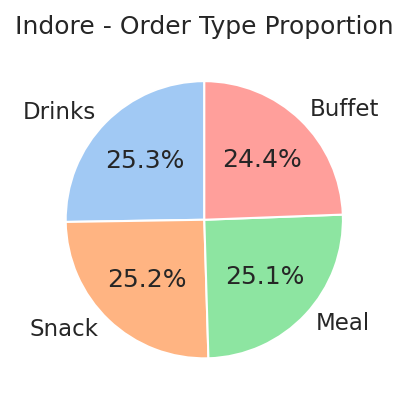

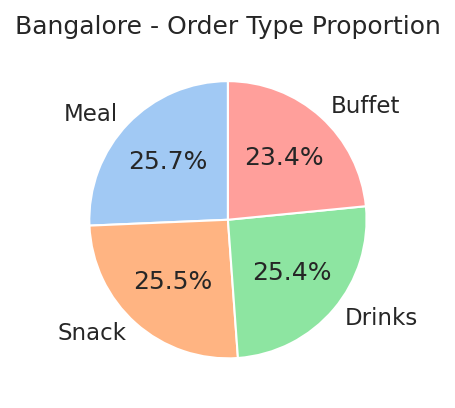

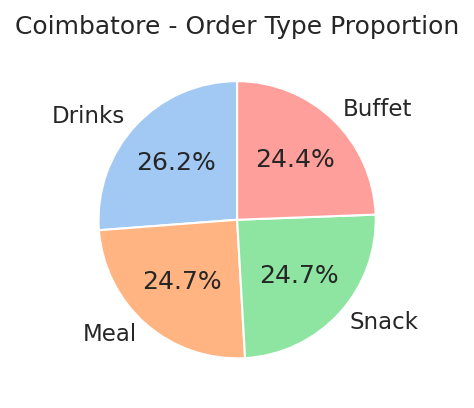

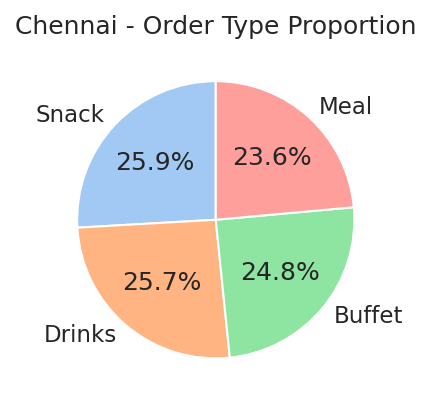

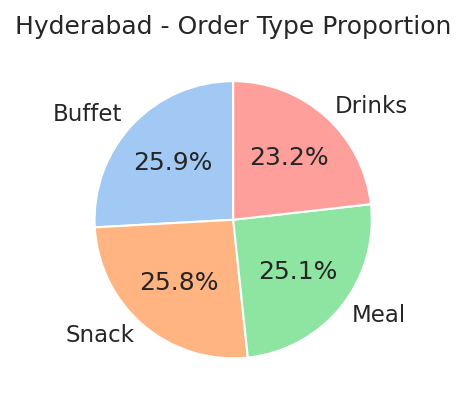

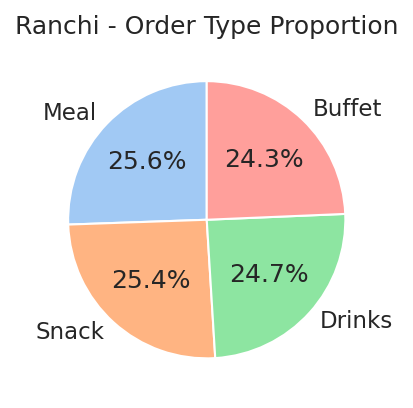

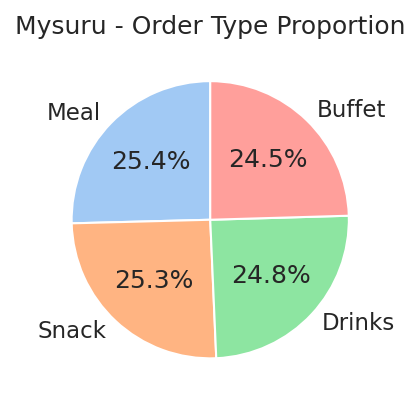

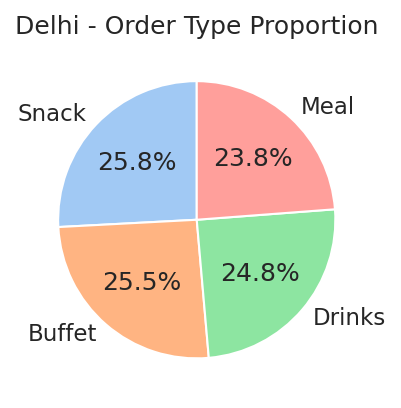

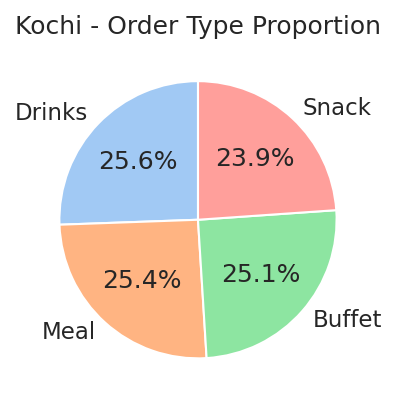

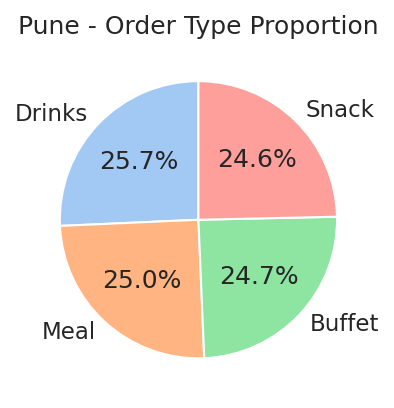

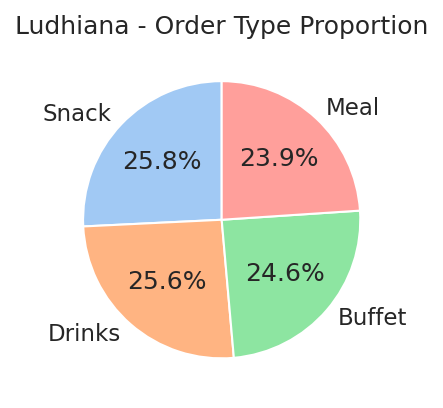

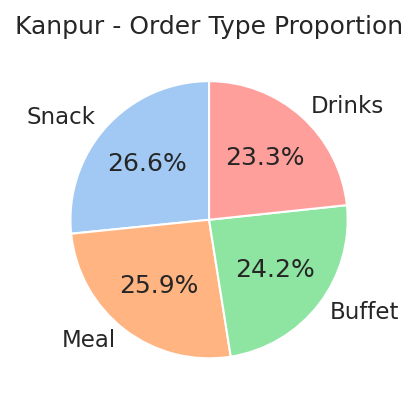

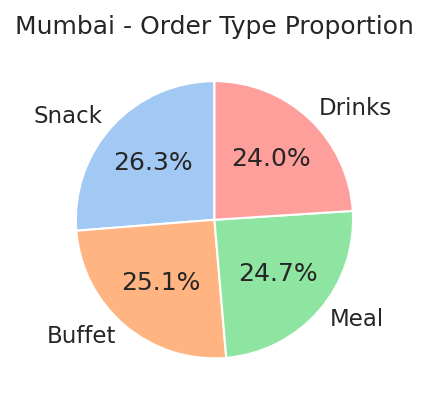

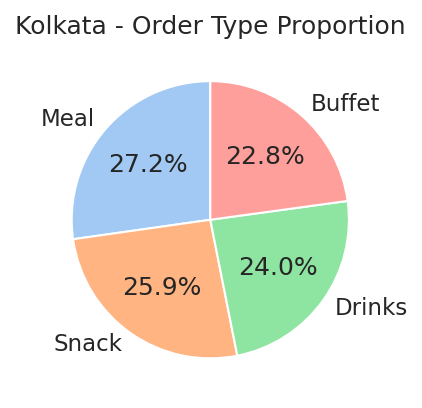

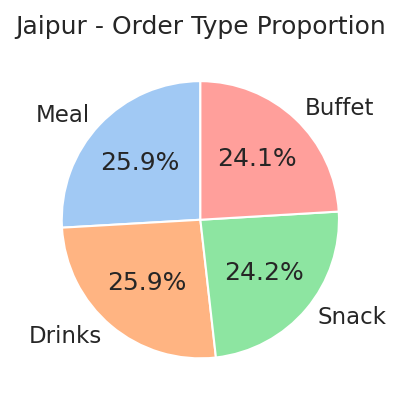

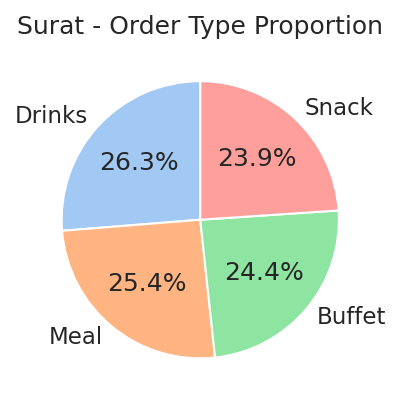

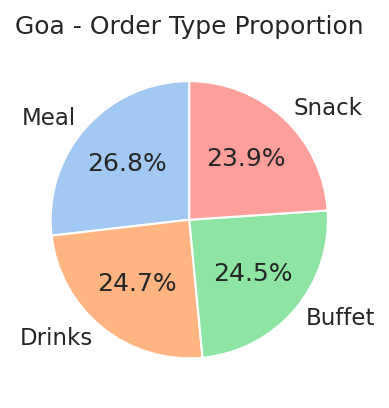

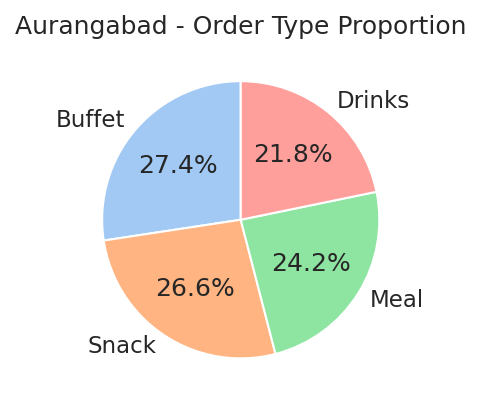

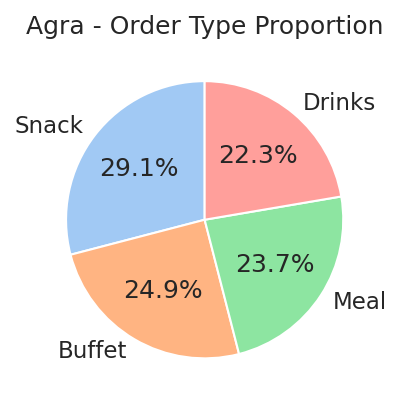

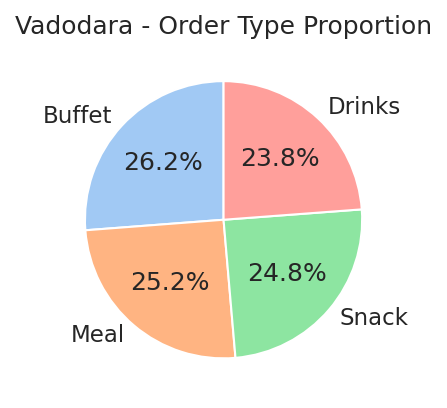

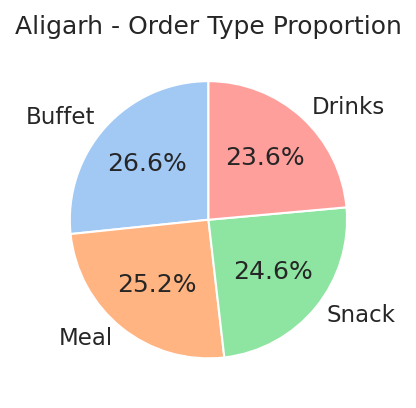

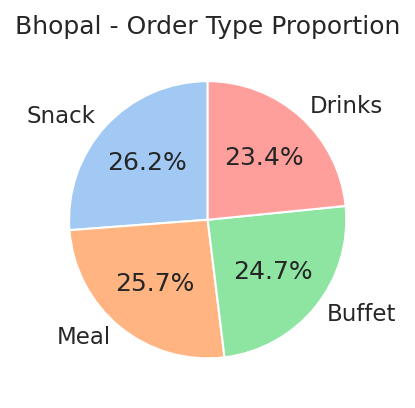

In [36]:
# Create a pie chart for each city
unique_cities = df['City_code'].unique()

for city in unique_cities:
    plt.figure(figsize=(3,3))
    city_data = df[df['City_code'] == city]
    order_type_counts = city_data['Type_of_order'].value_counts()
    plt.pie(order_type_counts, labels=order_type_counts.index, autopct='%1.1f%%', startangle=90,colors=sns.color_palette('pastel'))
    plt.title(f'{city} - Order Type Proportion')
    plt.show()

**Upon comparing all the pie charts, it's evident that all cities exhibit nearly equal distribution among order types**

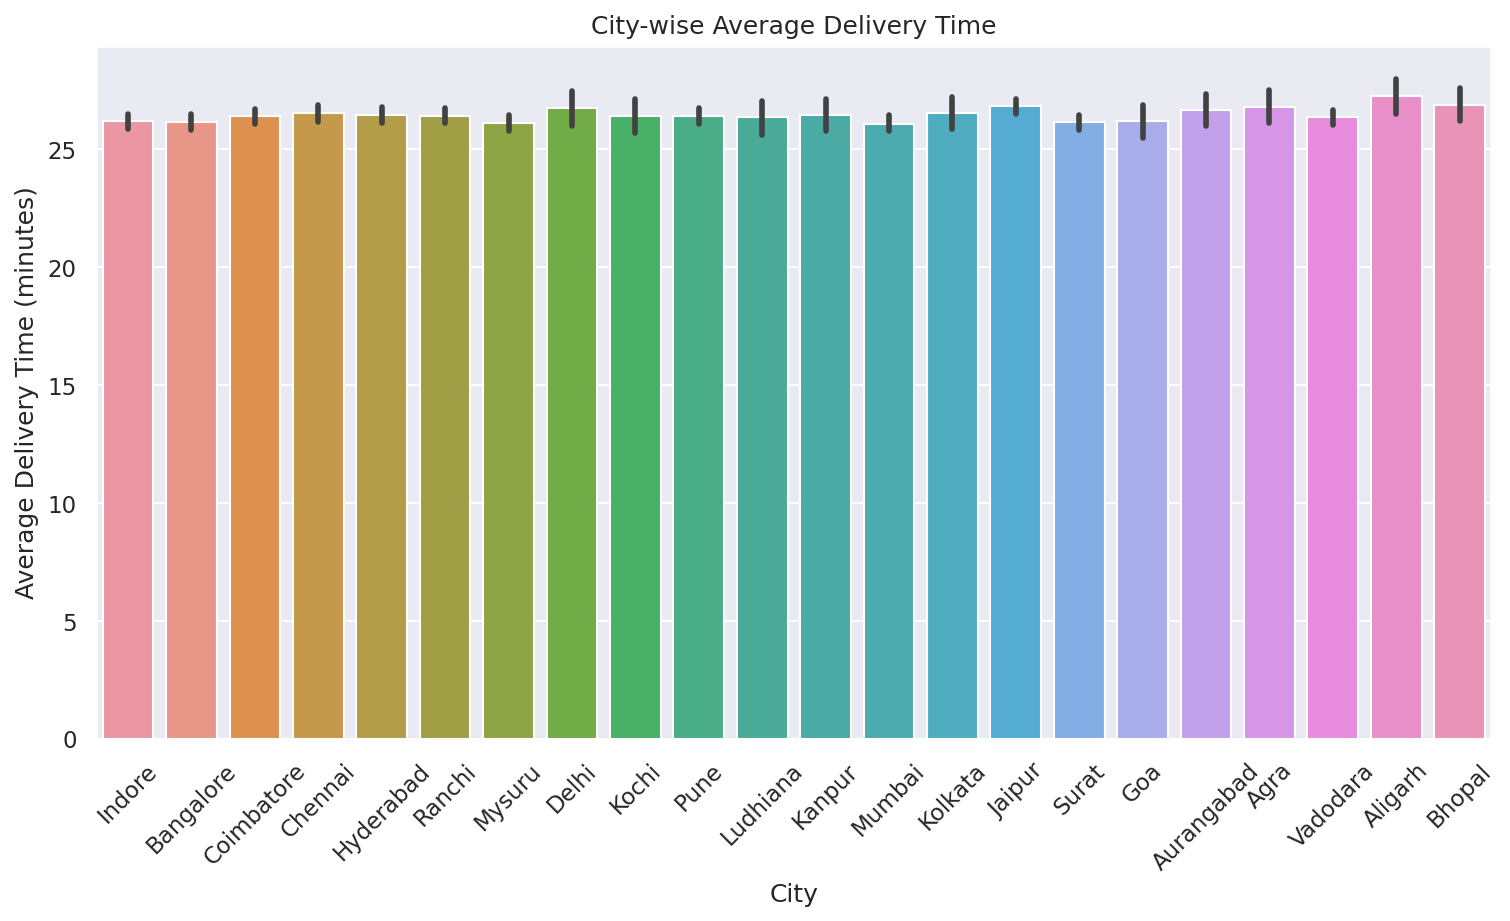

In [37]:
# Create a bar plot for city-wise delivery time taken
plt.figure(figsize=(12, 6))
sns.barplot(x='City_code', y='Time_taken(min)', data=df)
plt.title('City-wise Average Delivery Time')
plt.xlabel('City')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

**There is an even distribution of average order time across all cities, showcasing a similar trend in order times among them.**

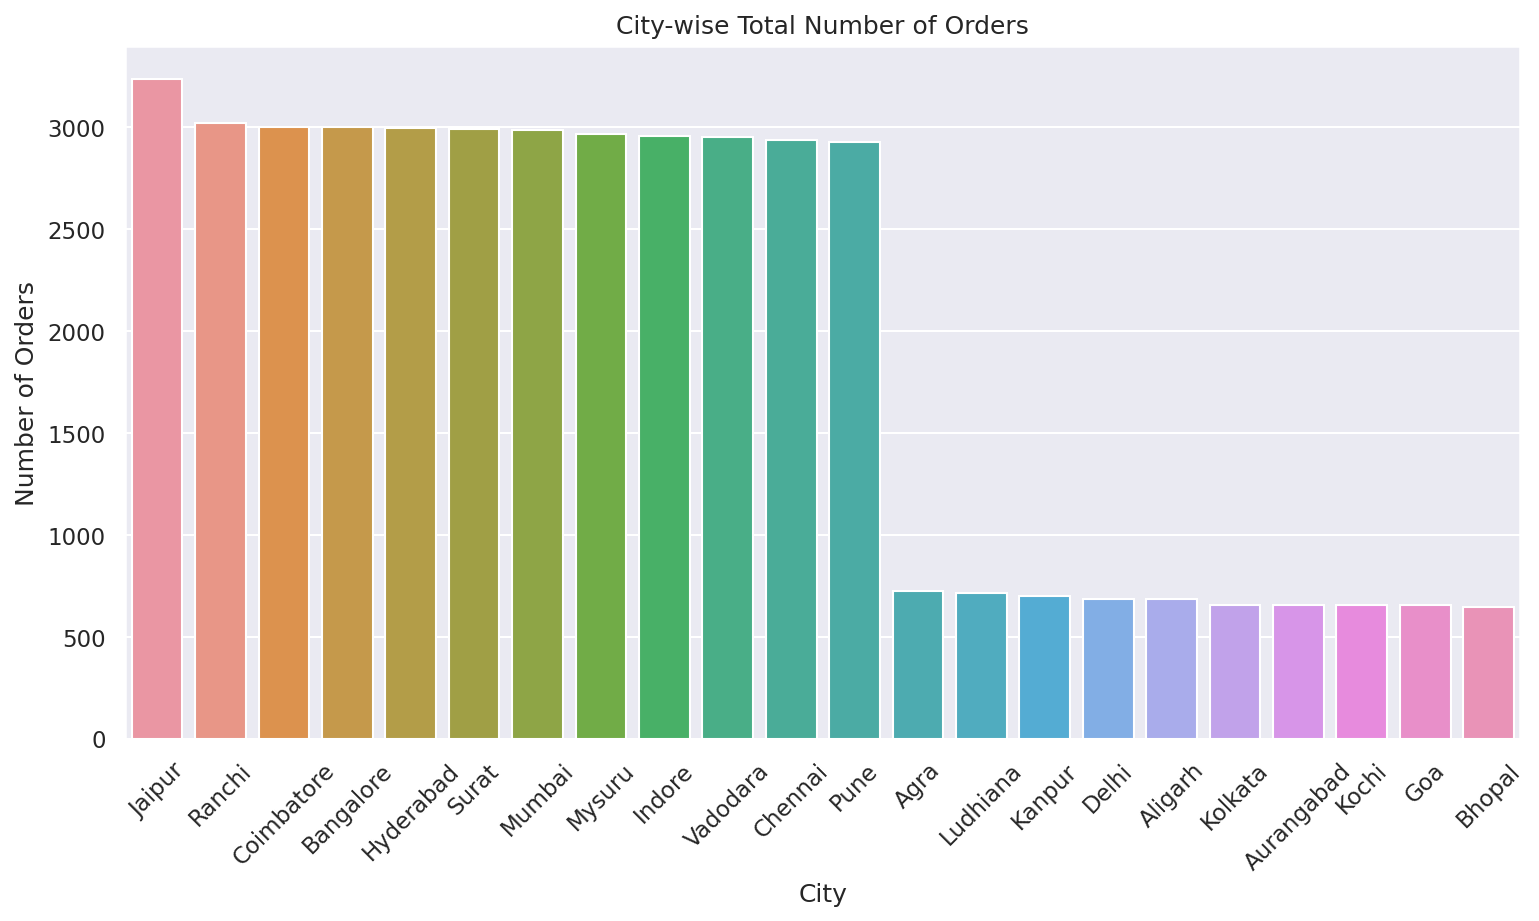

In [38]:
# Create a bar plot for city-wise total number of orders
plt.figure(figsize=(12, 6))
sns.countplot(x='City_code', data=df, order=df['City_code'].value_counts().index)
plt.title('City-wise Total Number of Orders')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


- **Jaipur records the highest number of orders, followed by a relatively equal distribution among Ranchi, Coimbatore, Bangalore, Surat, Mumbai, Mysuru, Indore, Vadodara, Chennai, and Pune**
- **In contrast, Agra, Ludhiana, Kanpur, Delhi, Aligarh, Kolkata, Aurangabad, Kochi, Goa, and Bhopal exhibit a similar trend but with lower order numbers.**

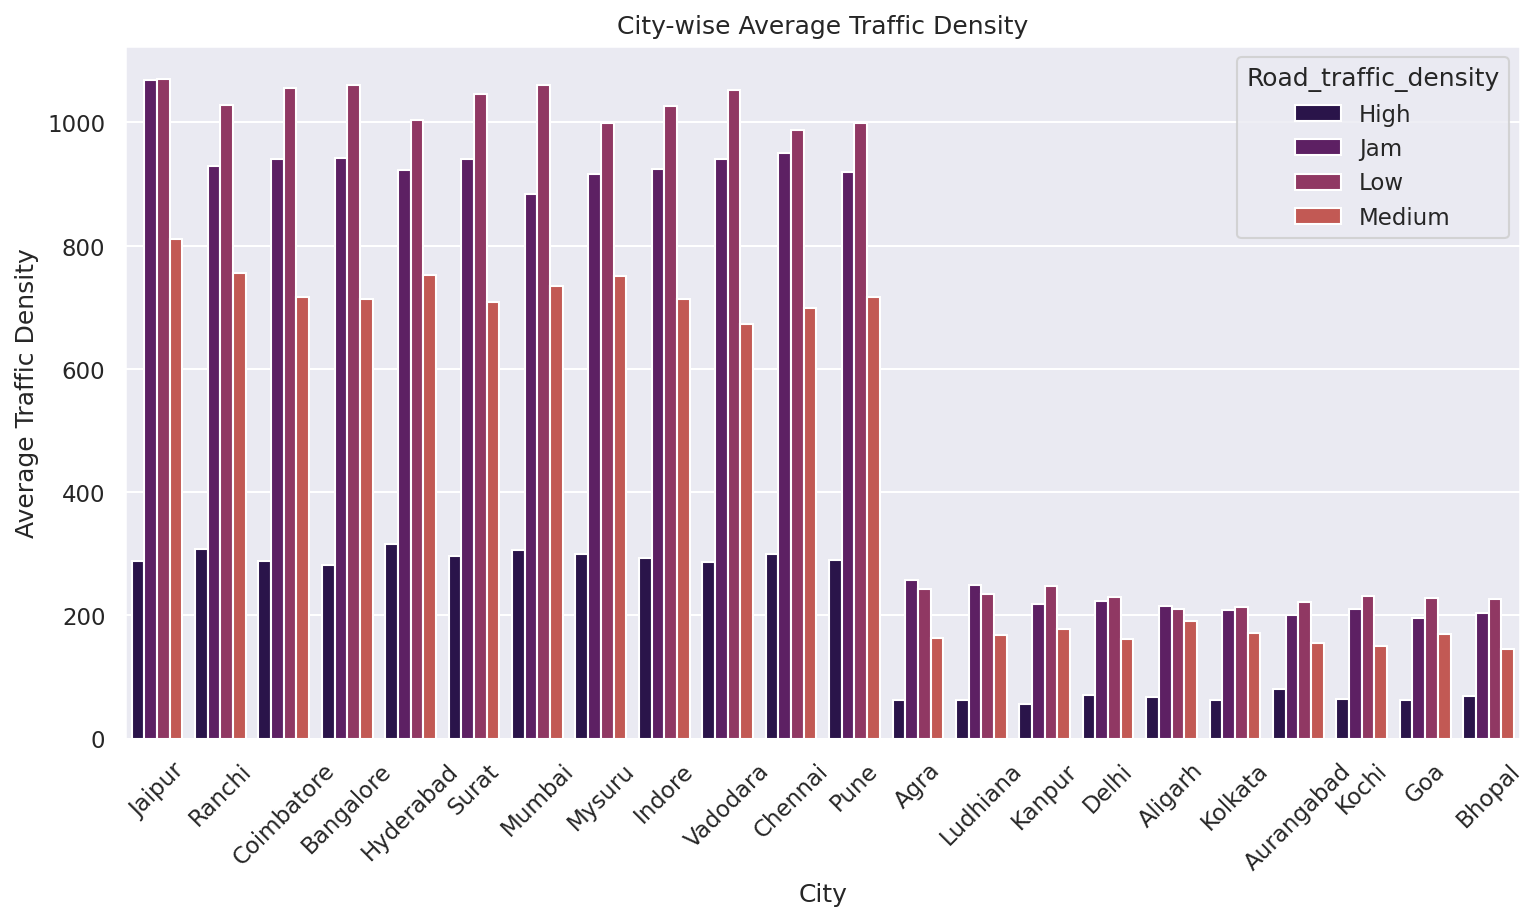

In [39]:
# Create a bar plot for city-wise traffic density
plt.figure(figsize=(12, 6))
sns.countplot(x='City_code', hue = 'Road_traffic_density', data=df, order=df['City_code'].value_counts().index)
plt.title('City-wise Average Traffic Density')
plt.xlabel('City')
plt.ylabel('Average Traffic Density')
plt.xticks(rotation=45)
plt.show()

- **Jaipur records the highest traffic density, followed by a relatively equal distribution among Ranchi, Coimbatore, Bangalore, Surat, Mumbai, Mysuru, Indore, Vadodara, Chennai, and Pune.**
- **In contrast, Agra, Ludhiana, Kanpur, Delhi, Aligarh, Kolkata, Aurangabad, Kochi, Goa, and Bhopal exhibit a similar trend but with lower traffic density.**

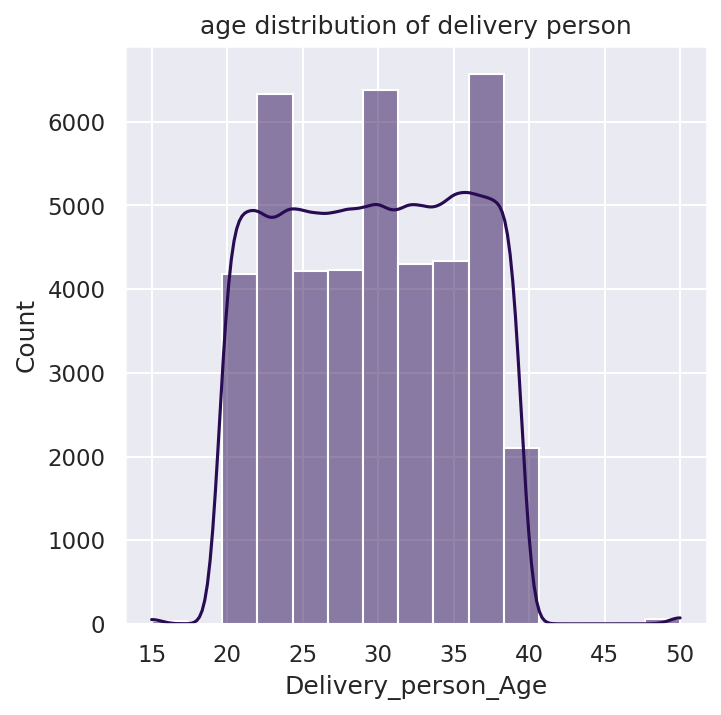

In [40]:
# getting age distribution od delivery persons

sns.histplot(data = df, x = 'Delivery_person_Age', kde = True, bins=15)
plt.title('age distribution of delivery person')
plt.show()

**The majority of delivery person fall within the age range of 20 to 40 years.**

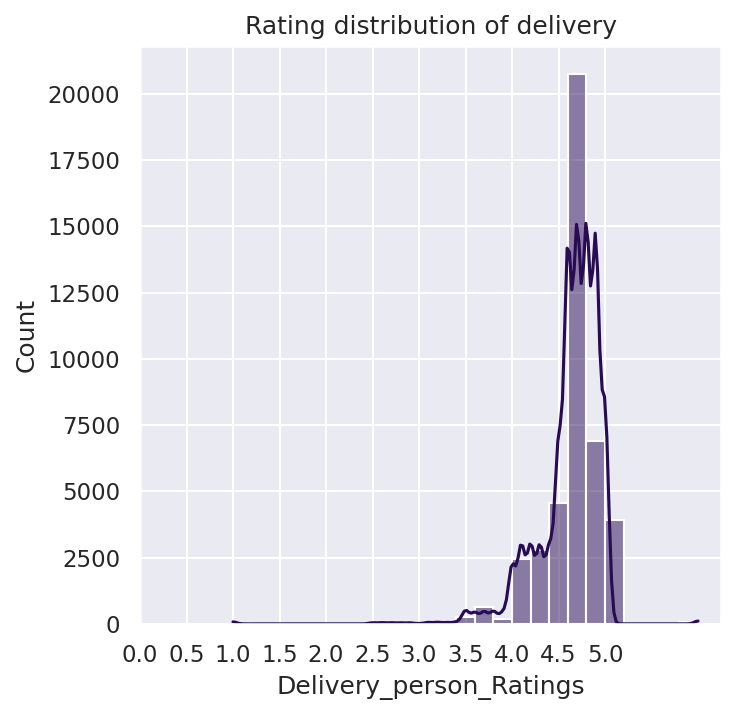

In [41]:
# distribution of ratings for delivery person

sns.histplot(data = df, x = 'Delivery_person_Ratings', kde = True, bins=25)
plt.title('Rating distribution of delivery')
plt.xticks(np.arange(0, 5.5, 0.5))
plt.show()

**The majority of delivery personreceive ratings between 4 to 5, with 4.5 being the most common rating**

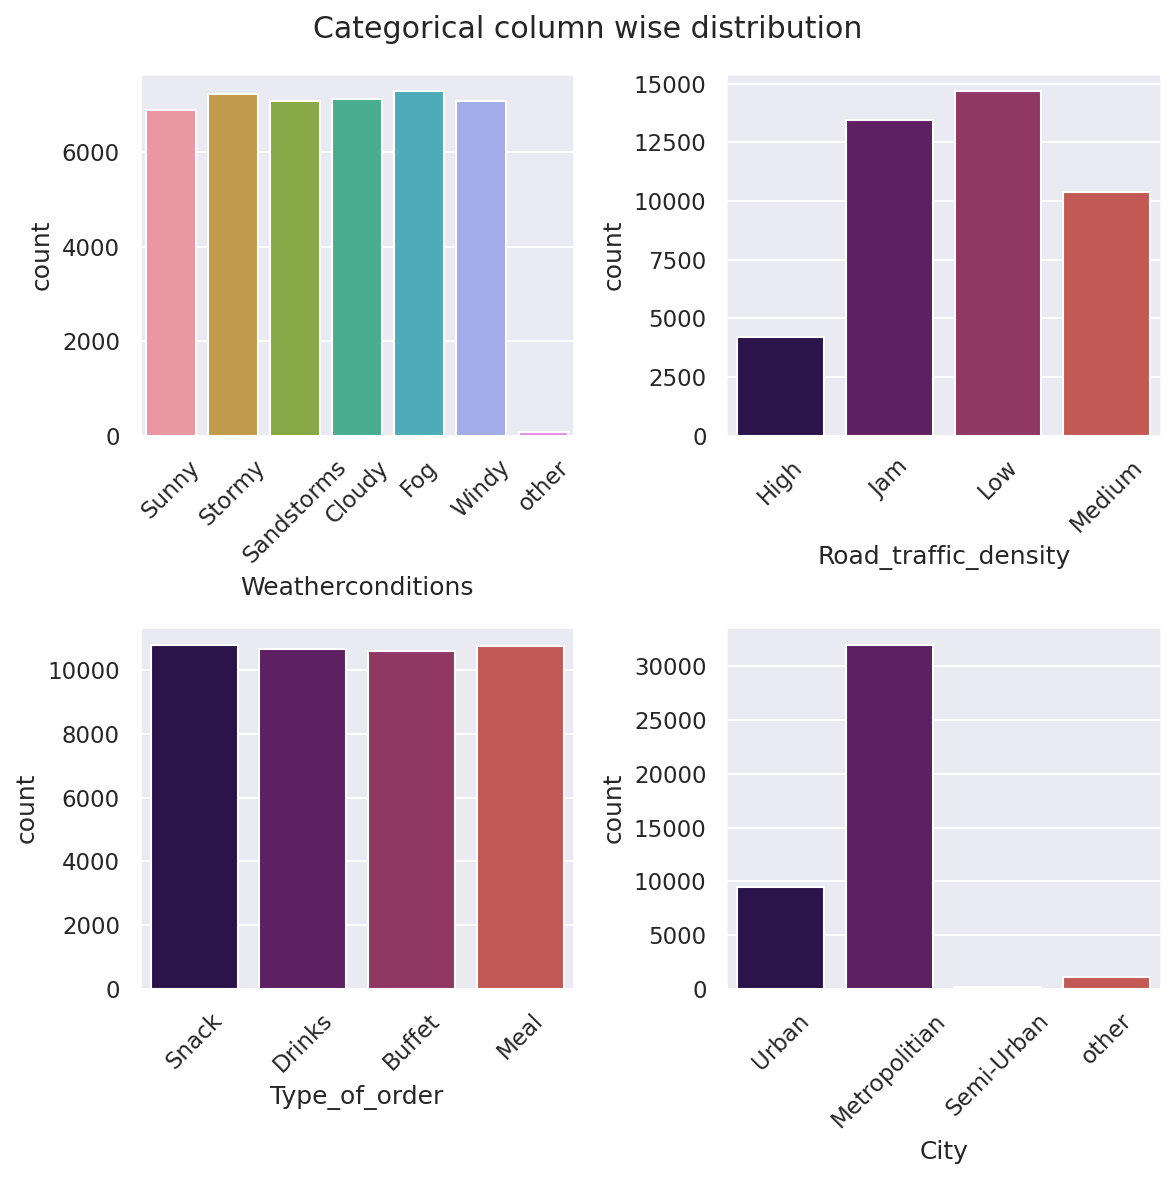

In [42]:
# distribution of categorical columns

plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Weatherconditions')
plt.xticks(rotation = 45)
plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Road_traffic_density')
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'Type_of_order')
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.countplot(data = df, x = 'City')
plt.xticks(rotation = 45)
plt.suptitle('Categorical column wise distribution')
plt.tight_layout()

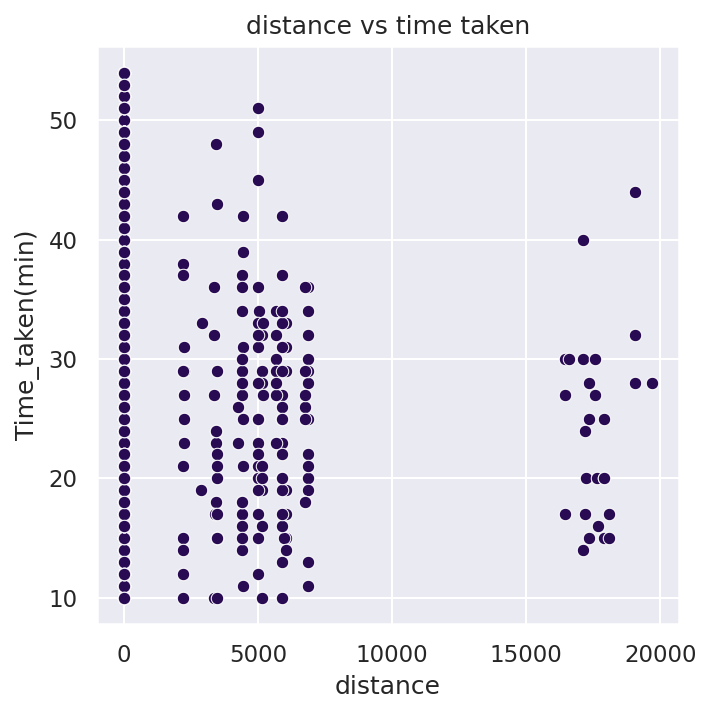

In [43]:
## delivery time vs distance

sns.scatterplot(data = df, y = 'Time_taken(min)', x = 'distance')
plt.title('distance vs time taken')
plt.show()

**consistent relationship exists between the time taken and the distance traveled for food delivery. Most delivery partners consistently deliver food within 25-30 minutes, irrespective of the distance.**

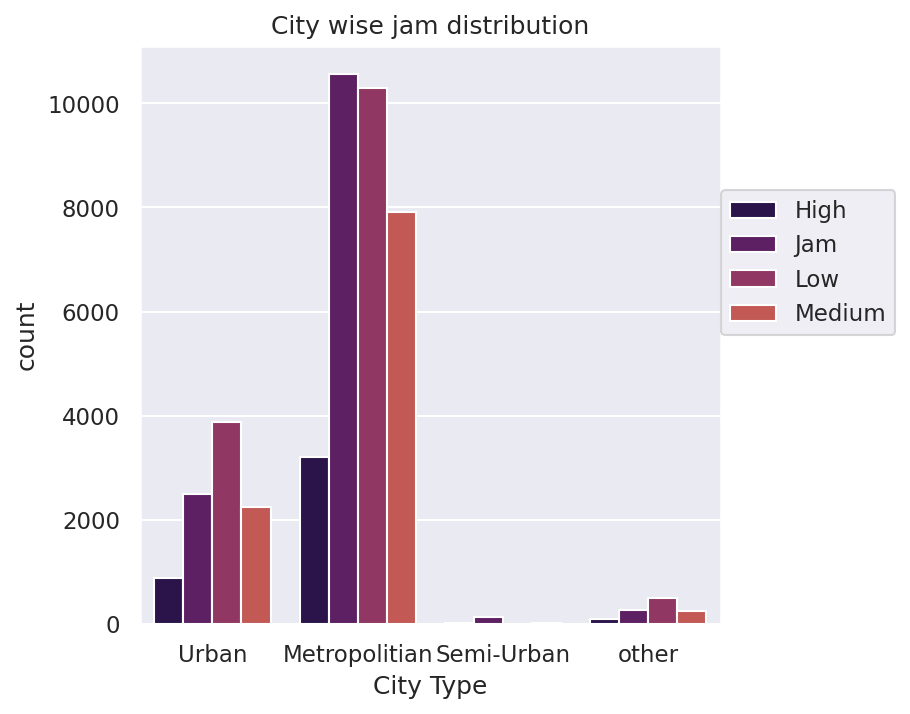

In [44]:
# jam distribution by each city type

sns.countplot(data = df, x= 'City', hue = 'Road_traffic_density')
plt.legend(loc = (1,0.5))
plt.title('City wise jam distribution')
plt.xlabel('City Type')
plt.show()

**Metropolitan cities experience more significant traffic congestion compared to urban and semi-urban areas**

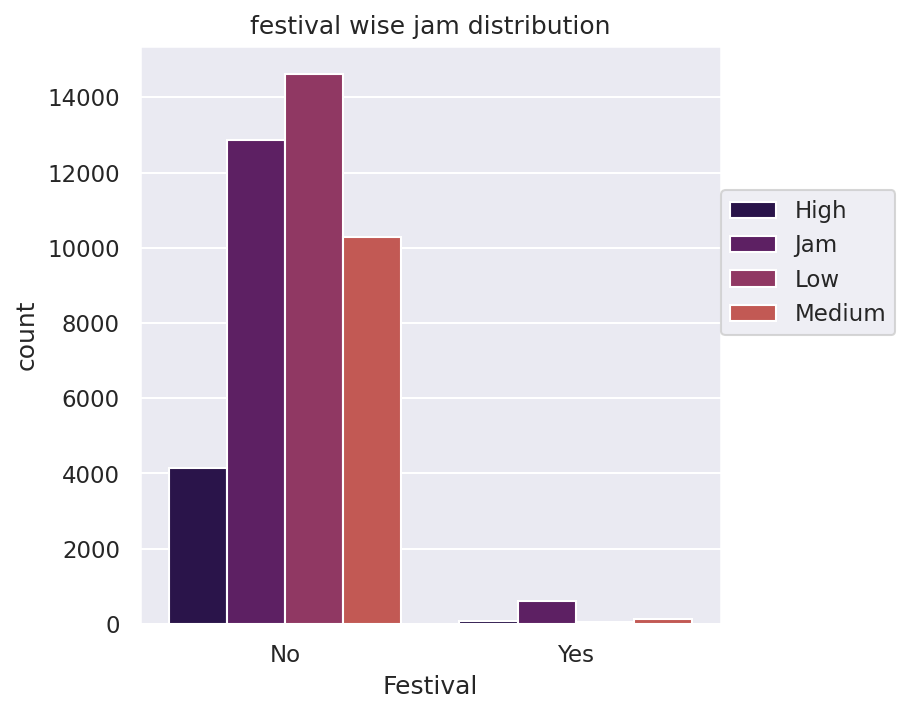

In [45]:
sns.countplot(data = df, x= 'Festival', hue = 'Road_traffic_density')
plt.legend(loc = (1,0.5))
plt.title('festival wise jam distribution')
plt.show()

**It is noted that there is a higher likelihood of traffic congestion during non-festival periods**

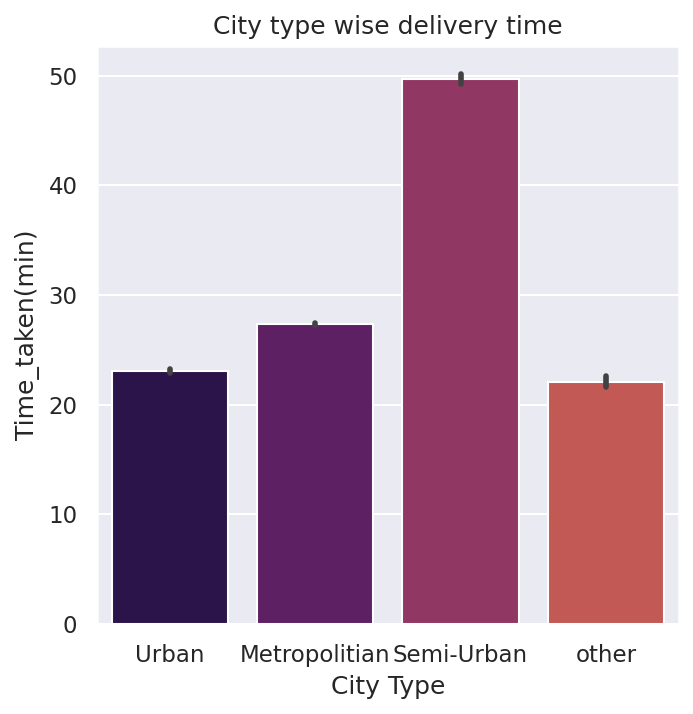

In [46]:
sns.barplot(data = df, x = 'City', y = 'Time_taken(min)')
plt.title('City type wise delivery time')
plt.xlabel('City Type')
plt.show()

**it is observed that semi urban cities has highest delivery time followed by metropolitian cities**

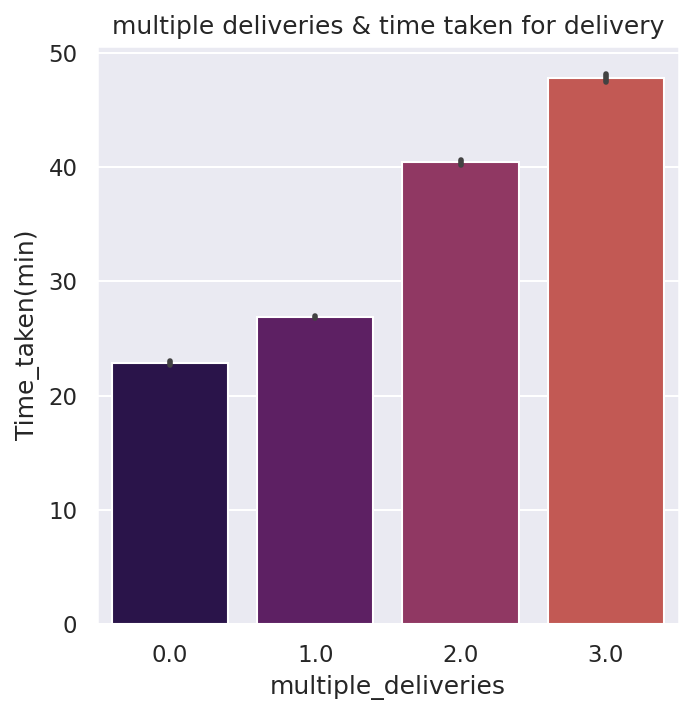

In [47]:
sns.barplot(data = df, x = 'multiple_deliveries', y = 'Time_taken(min)')
plt.title('multiple deliveries & time taken for delivery')
plt.show()

**The greater the number of deliveries, the longer the delivery time.**

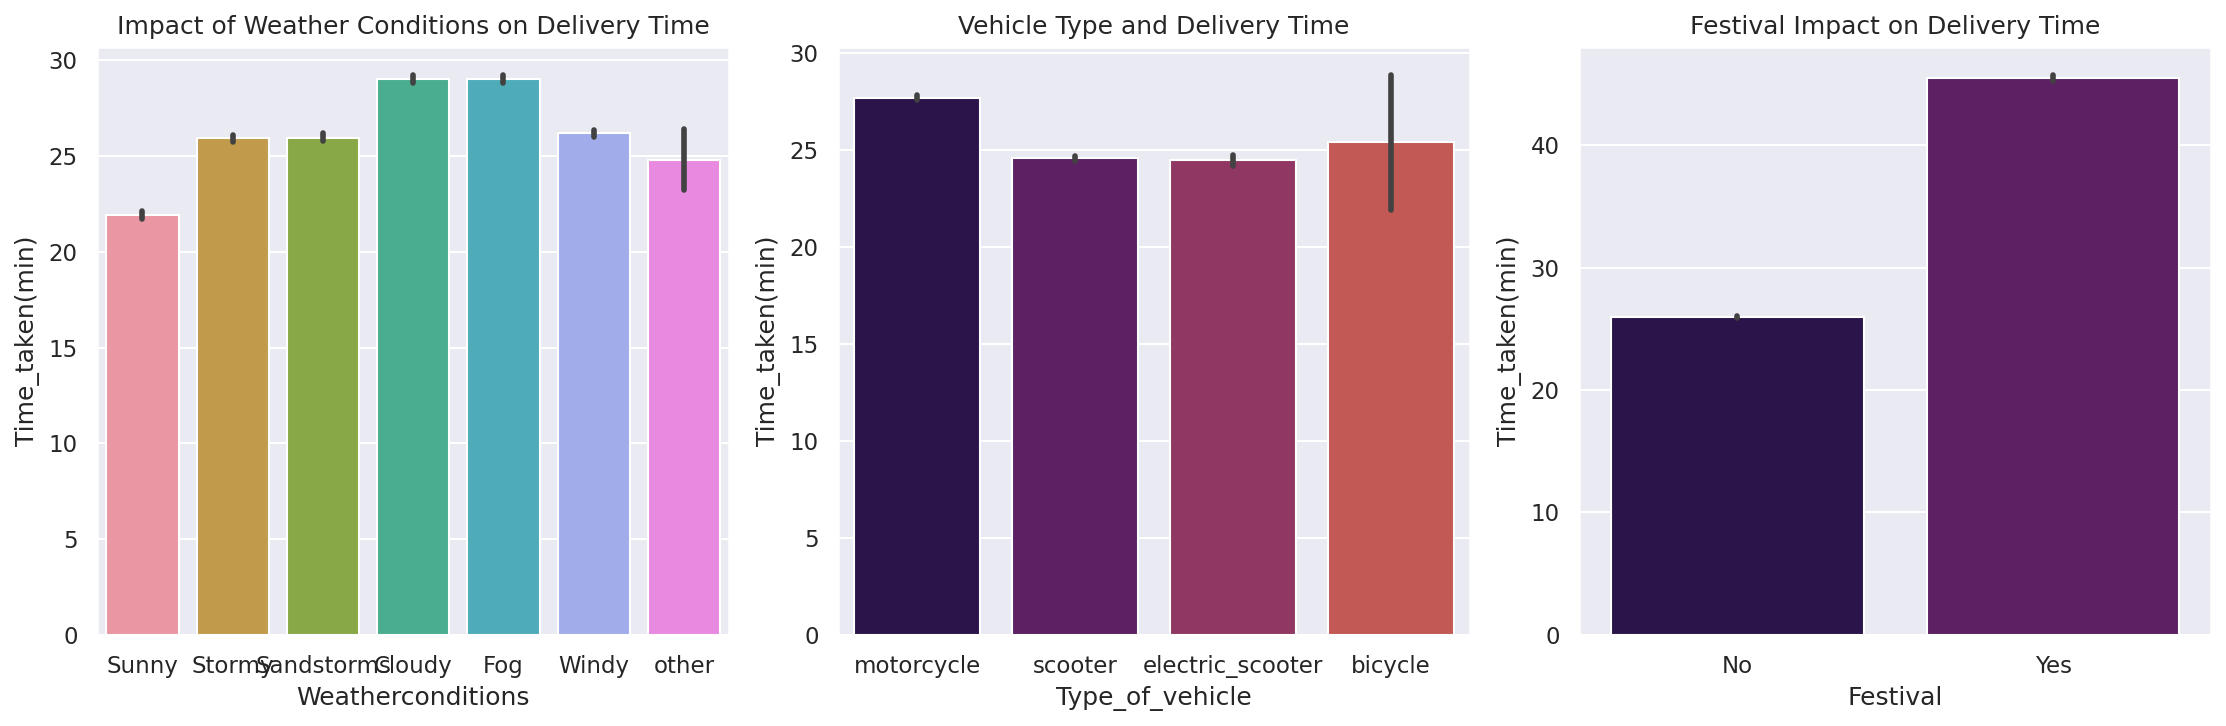

In [48]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Subplot 1: Impact of Weather Conditions on Delivery Time
sns.barplot(x='Weatherconditions', y='Time_taken(min)', data=df, ax=axes[0])
axes[0].set_title('Impact of Weather Conditions on Delivery Time')

# Subplot 2: Vehicle Type and Delivery Time
sns.barplot(x='Type_of_vehicle', y='Time_taken(min)', data=df, ax=axes[1])
axes[1].set_title('Vehicle Type and Delivery Time')

# Subplot 3: Festival Impact on Delivery Time
sns.barplot(x='Festival', y='Time_taken(min)', data=df, ax=axes[2])
axes[2].set_title('Festival Impact on Delivery Time')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- **The longest delivery times occur under cloudy and foggy weather conditions, while delivery times under other weather conditions (sunny, stormy, windy) are similar.**
- **Surprisingly, motorcycles have the highest delivery times compared to other modes of transportation.**
- **During festivals, delivery times are significantly higher than during non-festival seasons.**

In [49]:
'''fig = px.scatter_geo(data_frame=df[df['Delivery_person_Age'].notnull()],
                     lat='Delivery_location_latitude', lon='Delivery_location_longitude',
                     hover_data='Type_of_vehicle',scope='asia', color='Delivery_person_Age',
                     template="plotly_dark", title='Overview')
fig.show()'''

'fig = px.scatter_geo(data_frame=df[df[\'Delivery_person_Age\'].notnull()], \n                     lat=\'Delivery_location_latitude\', lon=\'Delivery_location_longitude\', \n                     hover_data=\'Type_of_vehicle\',scope=\'asia\', color=\'Delivery_person_Age\', \n                     template="plotly_dark", title=\'Overview\')\nfig.show()'

# Key Insights

## Order Insights:
**Uniform Order Type Distribution**
- All cities show nearly equal distribution among order types, indicating consistent preferences across locations.

**Consistent Order Times**
- Average order times are evenly distributed across cities, suggesting standardized efficiency in food delivery services.

## City-wise Trends:

**Jaipur Dominance**
- Jaipur records the highest number of orders and traffic density, outperforming other cities.

**Lower Order Numbers in Specific Cities**
- Agra, Ludhiana, Kanpur, Delhi, Aligarh, Kolkata, Aurangabad, Kochi, Goa, and Bhopal exhibit a similar trend with lower order numbers.

## Delivery Personnel:

**Youthful Workforce**
- The majority of delivery persons fall within the age range of 20 to 40 years.

**High Ratings**
- Delivery persons commonly receive ratings between 4 to 5, with 4.5 being the most frequent rating.

## Time-Distance Relationship:

**Efficient Delivery**
- A consistent relationship exists between time taken and distance traveled, with most deliveries completed within 25-30 minutes.

## Traffic and Location Insights:

**Metropolitan Traffic**
- Metropolitan cities experience more significant traffic congestion compared to urban and semi-urban areas.

**Traffic Congestion and Festivals**
- Higher traffic congestion is observed during non-festival periods, with potential traffic reduction during festivals.

**Urban vs. Semi-Urban Delivery Times**
- Semi-urban cities have higher delivery times compared to metropolitan cities.

## Operational Impact:

**Delivery Load Impact**
- A higher number of deliveries result in longer delivery times, emphasizing the need for load management.

## Weather and Vehicle Impact:

**Weather Conditions and Delivery Times**
- Cloudy and foggy weather conditions lead to longer delivery times compared to other weather conditions.

**Motorcycle Delivery Times**
- Motorcycles surprisingly have higher delivery times compared to other modes of transportation.

## Festival Period Impact:

**Festival Impact on Delivery Times**
- During festivals, delivery times are significantly higher than during non-festival seasons, highlighting operational challenges during peak demand.


# Data Preprocessing

In [50]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance,City_code
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2023-12-01 11:30:00,2023-12-01 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.025149,Indore
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2023-12-01 19:45:00,2023-12-01 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.183530,Bangalore
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2023-12-01 08:30:00,2023-12-01 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.552758,Bangalore
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,2023-12-01 18:00:00,2023-12-01 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.790401,Coimbatore
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2023-12-01 13:30:00,2023-12-01 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.210138,Chennai


### Outlier Handling

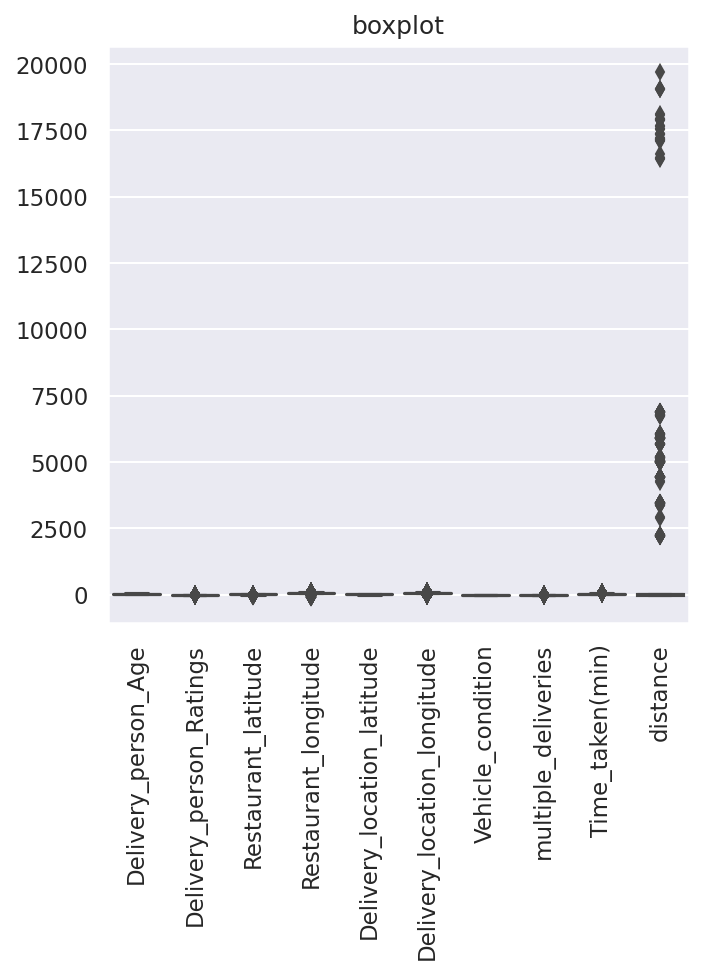

In [51]:
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title('boxplot')
plt.show()

In [52]:
# capping outlier
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col] > upper, col] = upper
    df.loc[df[col] < lower, col ] = lower
outlier_remove(df, 'Delivery_person_Ratings')
outlier_remove(df, 'distance')
outlier_remove(df, 'Restaurant_latitude')
outlier_remove(df, 'Restaurant_longitude')
outlier_remove(df, 'Delivery_location_latitude')
outlier_remove(df, 'Delivery_location_longitude')

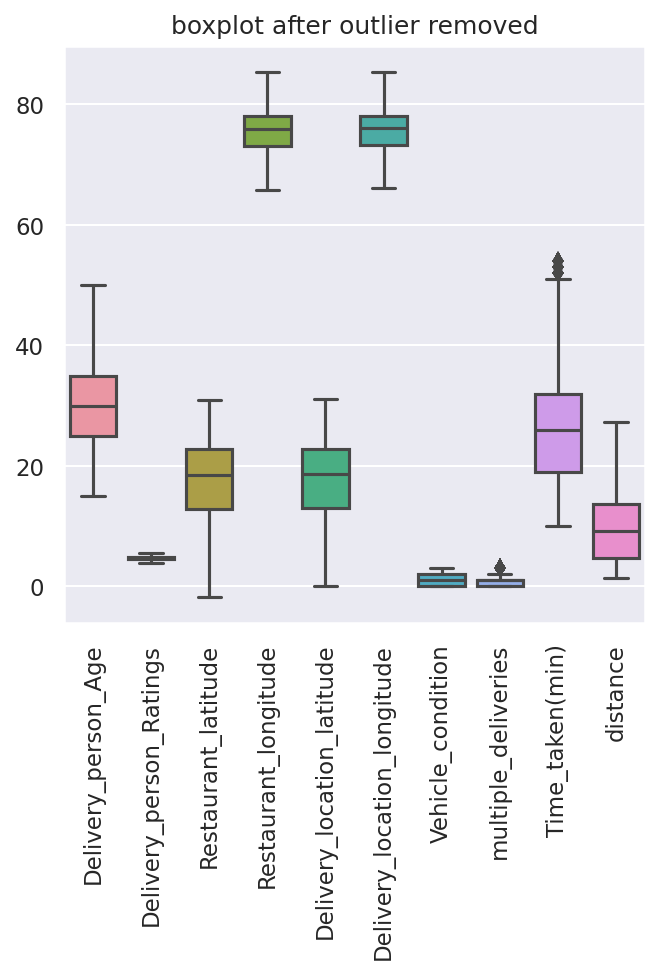

In [53]:
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title('boxplot after outlier removed')
plt.show()

### Feature Encoding

In [54]:
# One-Hot Encoding for 'Type_of_order' and 'Type_of_vehicle'
df = pd.get_dummies(df, columns=['Type_of_order', 'Type_of_vehicle'], drop_first=True)

# Label Encoding for 'Weather_conditions' if there's ordinal information
label_encoder = LabelEncoder()
df['Weatherconditions'] = label_encoder.fit_transform(df['Weatherconditions'])

### correlation Analysis

In [55]:
df.corr()['Time_taken(min)'].sort_values()

Delivery_person_Ratings            -0.363599
Vehicle_condition                  -0.242838
Weatherconditions                  -0.183693
Type_of_vehicle_scooter            -0.137625
Type_of_vehicle_electric_scooter   -0.061228
Type_of_order_Drinks               -0.006378
Type_of_order_Snack                -0.000498
Type_of_order_Meal                  0.006940
Restaurant_longitude                0.012556
Delivery_location_longitude         0.014565
Delivery_location_latitude          0.015595
Restaurant_latitude                 0.015680
Type_of_vehicle_motorcycle          0.165755
Delivery_person_Age                 0.298119
distance                            0.312103
multiple_deliveries                 0.388254
Time_taken(min)                     1.000000
Name: Time_taken(min), dtype: float64

<Axes: >

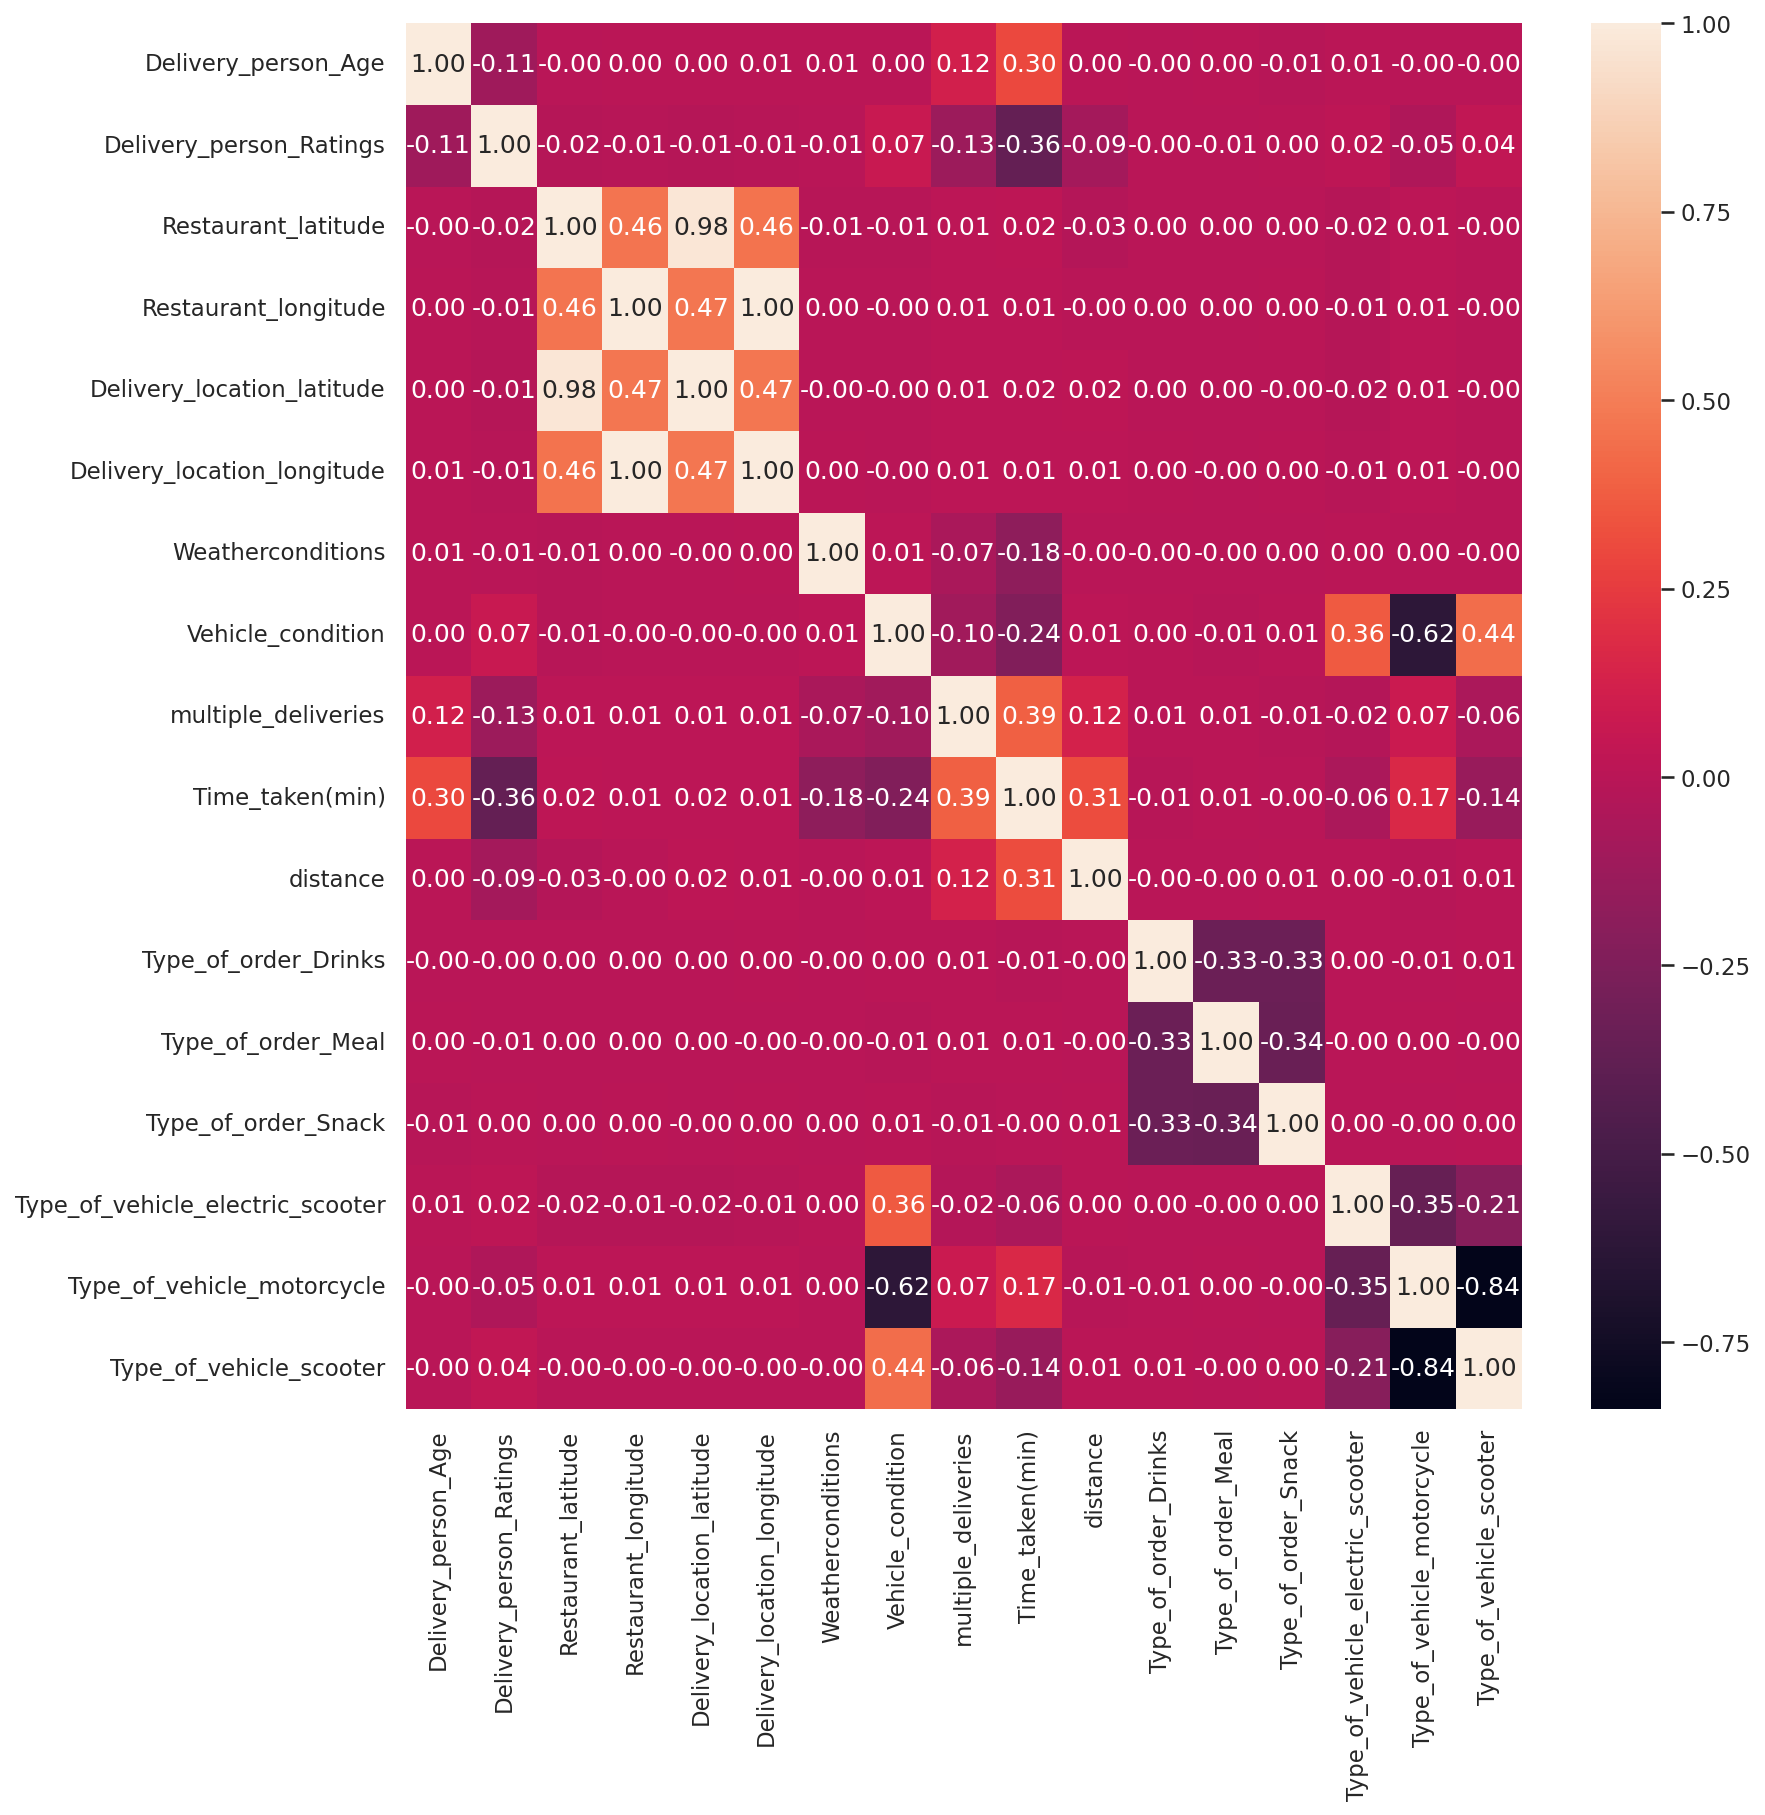

In [56]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot = True,fmt = '.2f')

### Feature Selection

In [58]:
x = np.array(df[["Delivery_person_Age","Delivery_person_Ratings","distance","multiple_deliveries"]])
y = np.array(df[["Time_taken(min)"]])

### Data splitting

In [62]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=101)

# model building

### reason for selecting LSTM model

1. **Sequencing Delivery Events:**
   - LSTMs adeptly capture the sequence of delivery events, crucial for predicting accurate food delivery times.

2. **Retaining Historical Context:**
   - LSTMs remember information from past deliveries, enabling the model to understand how historical events impact current delivery times.

3. **Adapting to Temporal Patterns:**
   - Effective at learning and adapting to temporal patterns specific to food delivery, considering factors like peak hours, day-of-week trends, and seasonal variations.

4. **Handling Variable Time Intervals:**
   - LSTMs accommodate irregular time intervals between order placement, preparation, and delivery, aligning with the dynamic nature of food delivery.

5. **Learning from Previous Order Experiences:**
   - LSTMs continuously improve predictions by learning from past order experiences, adjusting for factors that consistently influence delivery times.

6. **Flexibility with Diverse Features:**
   - LSTMs handle varying feature lengths and types, making them suitable for diverse features in food delivery, such as weather conditions, traffic, and multiple deliveries.

7. **Capturing Nuances in Feature Dynamics:**
   - Automatically captures nuanced relationships in features, aiding in understanding complex dynamics like the impact of changing weather or traffic conditions on delivery times.

8. **Preserving Critical Information:**
   - Mitigates information loss over time, ensuring that critical details from earlier stages of a delivery are retained, contributing to more accurate predictions.


In [63]:
# Create a sequential model for the LSTM network
lstm_model = Sequential()

# Add an LSTM layer with 128 units, returning sequences, and input shape defined by the training data dimensions
lstm_model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# Add another LSTM layer with 64 units, not returning sequences
lstm_model.add(LSTM(64, return_sequences=False))

# Add a dense layer with 25 units
lstm_model.add(Dense(25))

# Add a dense layer with 1 unit for the final prediction
lstm_model.add(Dense(1))

# Display a summary of the LSTM model architecture, including the number of parameters in each layer
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Compile the LSTM model using the Adam optimizer and mean squared error loss
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model on the training data
lstm_model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
29926/29926 [==============================] - 304s 10ms/step - loss: 58.6870
Epoch 2/15
29926/29926 [==============================] - 263s 9ms/step - loss: 53.7861
Epoch 3/15
29926/29926 [==============================] - 266s 9ms/step - loss: 51.7860
Epoch 4/15
29926/29926 [==============================] - 254s 8ms/step - loss: 50.5523
Epoch 5/15
29926/29926 [==============================] - 248s 8ms/step - loss: 50.0205
Epoch 6/15
29926/29926 [==============================] - 272s 9ms/step - loss: 49.5964
Epoch 7/15
29926/29926 [==============================] - 288s 10ms/step - loss: 49.6960
Epoch 8/15
29926/29926 [==============================] - 297s 10ms/step - loss: 49.2572
Epoch 9/15
29926/29926 [==============================] - 250s 8ms/step - loss: 48.7738
Epoch 10/15
29926/29926 [==============================] - 277s 9ms/step - loss: 48.7265
Epoch 11/15
29926/29926 [==============================] - 260s 9ms/step - loss: 48.3333
Epoch 12/15
29926/29926 [==

In [72]:
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance: "))
d = int(input("Multiple deliveries (0, 1, 2 or 3): "))

features = np.array([[a, b, c, d]])
print("\n\n Predicted Delivery Time in Minutes = ", lstm_model.predict(features))

Food Delivery Time Prediction
Age of Delivery Partner: 29
Ratings of Previous Deliveries: 5
Total Distance: 3
Multiple deliveries (0, 1, 2 or 3): 0
1/1 [==============================] - 0s 31ms/step


 Predicted Delivery Time in Minutes =  [[18.301441]]


### Final Conclusion:
**LSTM Model Selection:**

- The adoption of Long Short-Term Memory (LSTM) networks played a crucial role in our project for predicting food delivery times. LSTMs, known for capturing sequential dependencies, align seamlessly with the dynamic nature of our data. The architecture includes LSTM layers for sequencing and dense layers for predictions, totaling 117,619 trainable parameters, showcasing the model's robust capacity for learning complex relationships within the data.

**Performance Testing:**

- LSTM model showcased remarkable performance.
- By taking user input into consideration, we not only validated the model against historical data but also ensured its adaptability to real-world scenarios.
- The model's predictive capabilities were demonstrated through accurate estimations of food delivery times, highlighting its efficacy in optimizing delivery operations.


### Key Findings

#### Analysis based on cities
- Uniform order type distribution across cities suggests a consistent customer preference, streamlining menu planning and optimizing inventory management.
- Equally distributed average order times reflect standardized efficiency in food delivery services, ensuring a reliable and consistent customer experience.
- Jaipur's dominance in both order numbers and traffic density positions it as a central hub, requiring targeted optimization strategies for delivery operations.
- Cities with lower order numbers, such as Agra, Ludhiana, and Kochi, warrant focused marketing efforts to stimulate demand and enhance delivery operations in these areas.


#### Delivery Analysis

- A youthful delivery workforce (20 to 40 years) contributes to agile and efficient service, reflected in consistently high ratings (4 to 5) for enhanced customer satisfaction. Operational efficiency is evident in the time-distance relationship, with most deliveries completed within 25-30 minutes.

- Metropolitan areas experiencing significant traffic congestion require strategic route planning to minimize delays. Higher traffic during non-festival periods emphasizes the need for logistics planning, while longer delivery times in semi-urban areas highlight the importance of tailored strategies in diverse locations. Managing delivery load becomes crucial for maintaining service efficiency, especially during longer delivery times.

- Adaptable logistics and contingency plans are essential for addressing longer delivery times during adverse weather conditions, such as cloudy and foggy weather. The unexpected longer delivery times for motorcycles necessitate a closer examination of factors influencing vehicle performance.

- Delays during festivals underscore operational challenges during peak demand, calling for proactive planning and resource allocation to ensure efficient service.







